# Active Filament simulation modules test notebook

In [41]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
from sys import platform

import pyfilaments.analysisutils as analysis
from pyfilaments.activeFilaments import activeFilament

import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

# Check which platform
if platform == "linux" or platform == "linux2":
    print("linux system")
    # root_path = '/home/deepak/Dropbox/LacryModeling/ModellingResults'
    root_path = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults'

elif platform == 'darwin':
    print("OSX system")
    root_path = '/Users/deepak/Dropbox/LacryModeling/ModellingResults'

linux system


<IPython.core.display.Javascript object>


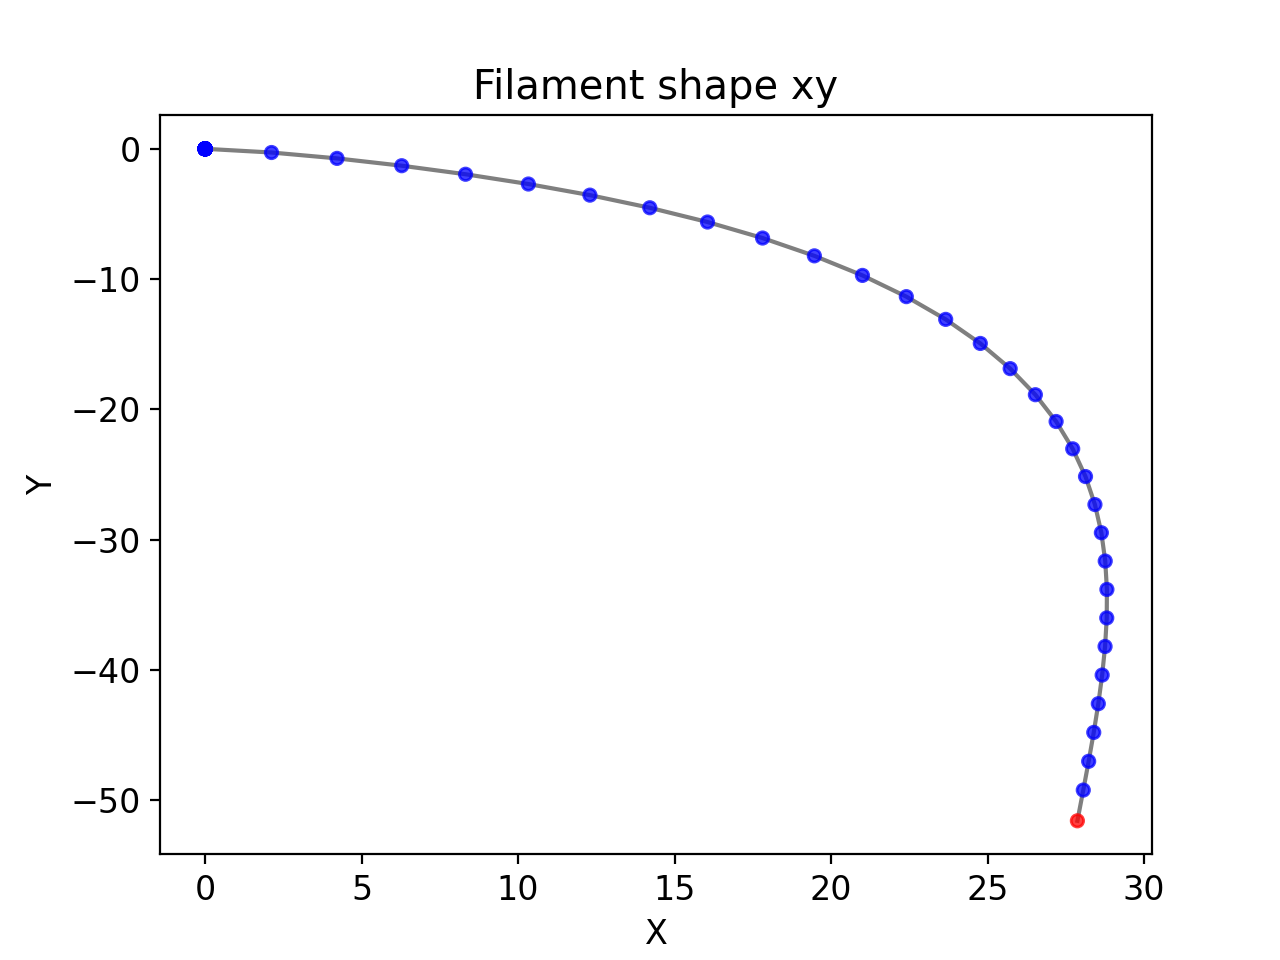


Param: 15.0 Progress:   0%|          | 0/100 [00:00<?, ?it/s]
Param: 15.0 Progress:   5%|▍         | 4.8822388795174/100 [00:00<00:01, 69.24it/s]

Initializing filament as a line at angle 0
line
Running the filament simulation ....



Param: 15.0 Progress:  10%|▉         | 9.926795410017334/100 [00:00<00:01, 75.27it/s]
Param: 15.0 Progress:  15%|█▍        | 14.567950723025943/100 [00:00<00:01, 76.44it/s]
Param: 15.0 Progress:  20%|██        | 20.02149179243564/100 [00:00<00:01, 77.44it/s] 
Param: 15.0 Progress:  26%|██▌       | 26.014976919558286/100 [00:00<00:00, 77.93it/s]
Param: 15.0 Progress:  32%|███▏      | 32.246665674879544/100 [00:00<00:00, 77.32it/s]
Param: 15.0 Progress:  39%|███▊      | 38.72243661273322/100 [00:00<00:00, 73.91it/s] 
Param: 15.0 Progress:  46%|████▌     | 45.70051069201076/100 [00:00<00:00, 79.12it/s]
Param: 15.0 Progress:  52%|█████▏    | 51.96615247575589/100 [00:00<00:00, 77.73it/s]
Param: 15.0 Progress:  59%|█████▉    | 59.143043463832946/100 [00:01<00:00, 83.49it/s]
Param: 15.0 Progress:  67%|██████▋   | 66.62151164213626/100 [00:01<00:00, 89.38it/s] 
Param: 15.0 Progress:  74%|███████▎  | 73.70483320200648/100 [00:01<00:00, 89.50it/s]
Param: 15.0 Progress:  81%|████████  | 81.1346

Saving results...


In [42]:
# Activity profile parameters
activity_timescale = 750
duty_cycle = 0.5

# No:of activity cycles we want to simulate
n_activity_cycles = 1
# Total simulation time
Tf = activity_timescale*n_activity_cycles

# activity_timescale = 1000

# Total simulation time
# No:of time points saved
time_step_save = 10
Npts = int(Tf/time_step_save)

bc = {0:'clamped', -1:'free'}

fil = activeFilament(dim = 3, Np = 32, radius = 1, b0 = 2.1, k = 15.0, F0 = 0, S0 = 0, D0 = 1.5, bc = bc, clamping_vector = [1,0,0])

fil.plotFilament(r = fil.r0)

fil.simulate(Tf = Tf, Npts = Npts, n_cycles = n_activity_cycles, save = True, overwrite = False, path = root_path, sim_type = 'point', 
init_condition = {'shape':'line'}, 
    activity={'type':'square-wave','activity_timescale':activity_timescale, 'duty_cycle':duty_cycle, 'noise_scale':0.1})

fil.plotFilament(r = fil.r)

<IPython.core.display.Javascript object>


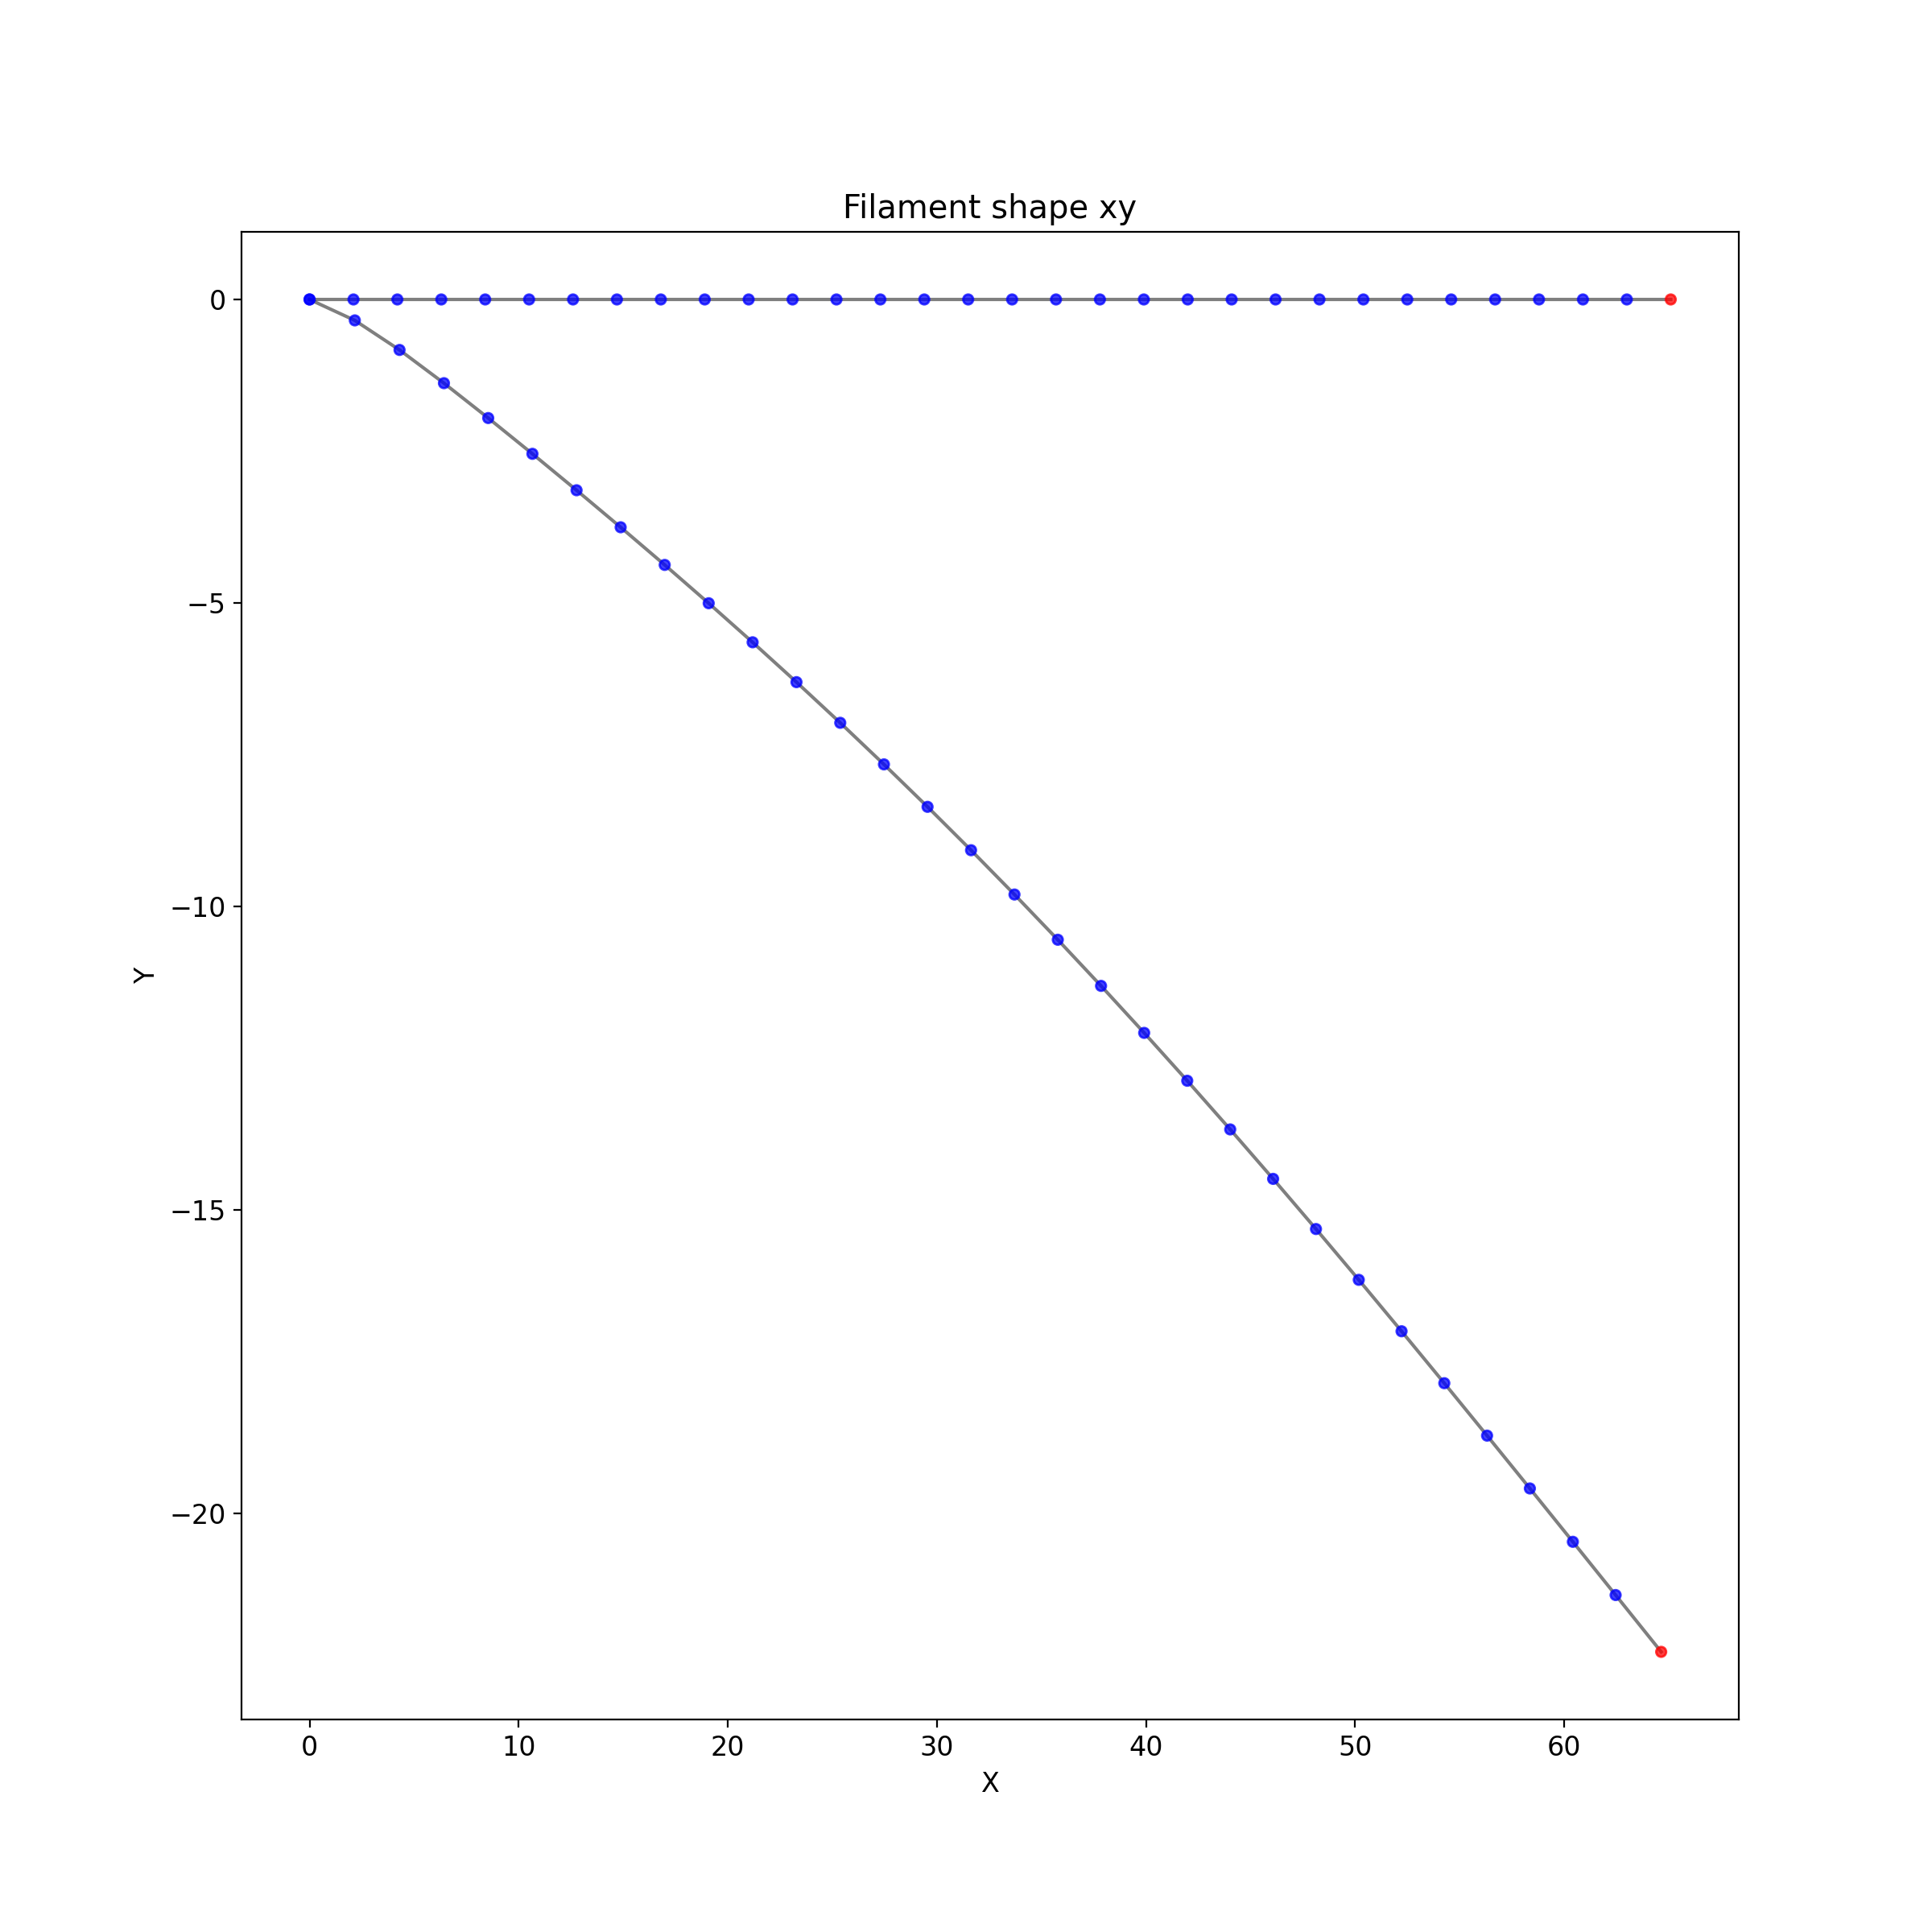

In [16]:
# Initial and Final filament shape
plt.figure(figsize=(6,6))
fil.plotFilament(r = fil.r0)
fil.plotFilament(r = fil.r)

## Run a new simulation with the filament shape (from previous simulation) as an initial condition

In [43]:
# Load an existing simulation if it exists

# folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-10-02/SimResults_Np_32_Shape_line_kappa_hat_4_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_500_simType_point'
# folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-10-02/SimResults_Np_32_Shape_line_kappa_hat_4_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-10-03/SimResults_Np_32_Shape_line_kappa_hat_4_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
file = 'SimResults_00.hdf5'
# fil = 
fil = activeFilament(dim = 3, Np = 32, radius = 1, b0 = 2.1, k = 15.0, F0 = 0, S0 = 0, D0 = 1.5, bc = bc, clamping_vector = [1,0,0])

fil.load_data(file = os.path.join(folder, file))




Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!


<IPython.core.display.Javascript object>


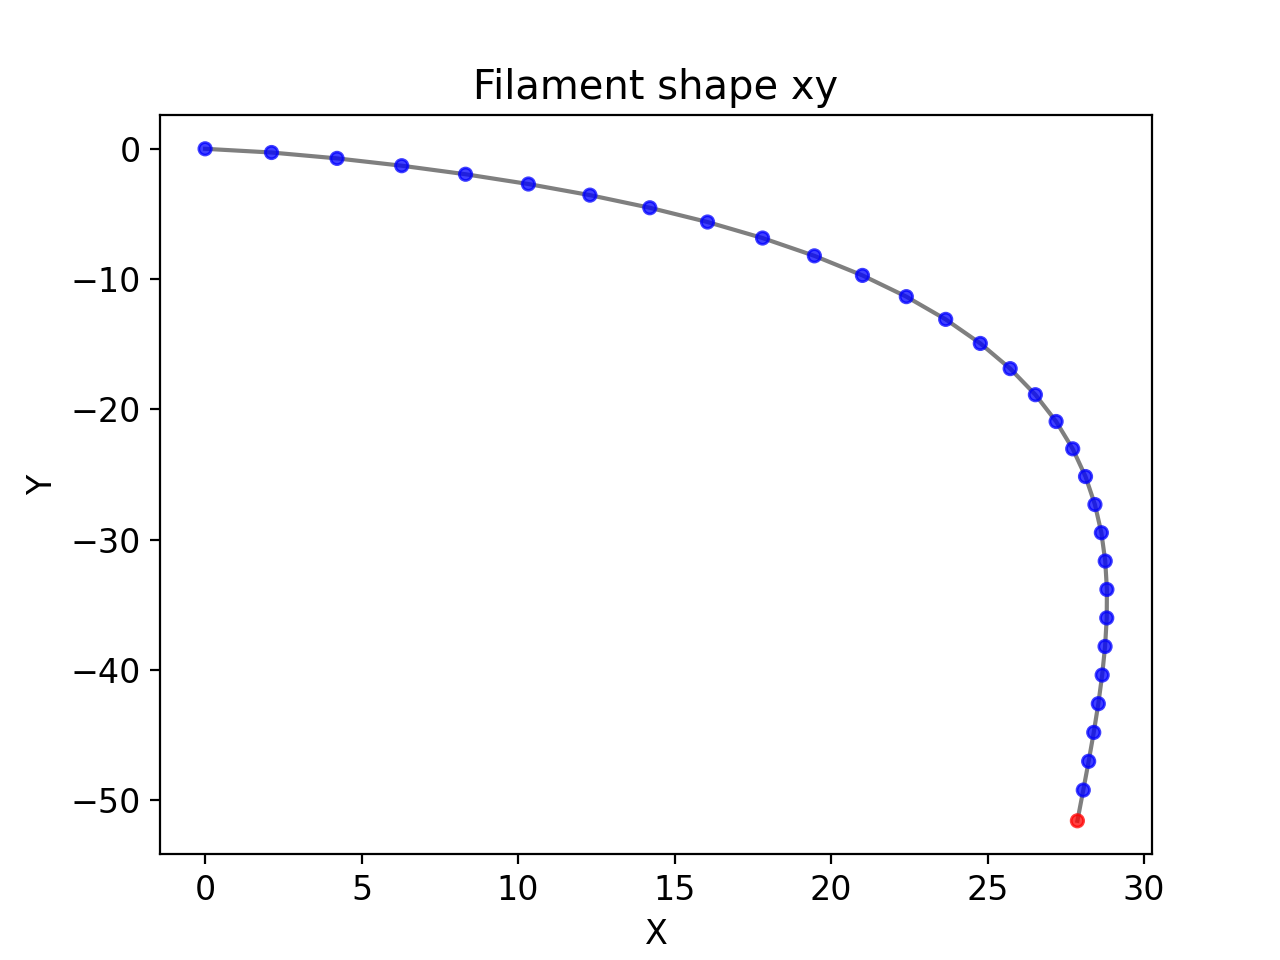

In [44]:
final_shape = fil.R[-1,:]
plt.figure()
fil.plotFilament(r = final_shape)

In [45]:
# Create a new filament instance for the next simulation
fil1 = activeFilament(dim = 3, Np = 32, radius = 1, b0 = 2.1, k = 15.0, F0 = 0, S0 = 0, D0 = 1.5, bc = bc, clamping_vector = [1,0,0])


In [48]:
# Run a simulation with another filament shape as initial condition
n_activity_cycles = 5
# Total simulation time
Tf = activity_timescale*n_activity_cycles

# activity_timescale = 1000

# Total simulation time
# No:of time points saved
time_step_save = 10
Npts = int(Tf/time_step_save)

bc = {0:'clamped', -1:'free'}
fil1.simulate(Tf = Tf, Npts = Npts, n_cycles = n_activity_cycles, save = True, overwrite = False, path = root_path, sim_type = 'point', 
    init_condition = {'filament':final_shape}, 
    activity={'type':'square-wave','activity_timescale':activity_timescale, 'duty_cycle':duty_cycle, 'noise_scale':0.1})




Param: 15.0 Progress:   0%|          | 0/100 [00:00<?, ?it/s]
Param: 15.0 Progress:   1%|          | 1.1159273093792341/100 [00:00<00:08, 11.16it/s]

line
Running the filament simulation ....



Param: 15.0 Progress:   2%|▏         | 2.324428897004123/100 [00:00<00:08, 11.69it/s] 
Param: 15.0 Progress:   4%|▎         | 3.5658896188369087/100 [00:00<00:08, 12.02it/s]
Param: 15.0 Progress:   5%|▍         | 4.8036882146466855/100 [00:00<00:07, 12.15it/s]
Param: 15.0 Progress:   6%|▌         | 6.033152944525819/100 [00:00<00:06, 13.47it/s] 
Param: 15.0 Progress:   7%|▋         | 7.320715103140648/100 [00:00<00:06, 14.87it/s]
Param: 15.0 Progress:   9%|▊         | 8.576254985334943/100 [00:00<00:05, 15.79it/s]
Param: 15.0 Progress:  10%|▉         | 9.862887904042982/100 [00:00<00:05, 16.60it/s]
Param: 15.0 Progress:  11%|█▏        | 11.395195337692474/100 [00:00<00:05, 16.90it/s]
Param: 15.0 Progress:  13%|█▎        | 12.769969474831903/100 [00:01<00:04, 17.72it/s]
Param: 15.0 Progress:  14%|█▍        | 14.215519296820013/100 [00:01<00:04, 18.48it/s]
Param: 15.0 Progress:  16%|█▌        | 15.753165279783877/100 [00:01<00:04, 19.70it/s]
Param: 15.0 Progress:  17%|█▋        | 17.159

Saving results...


<IPython.core.display.Javascript object>


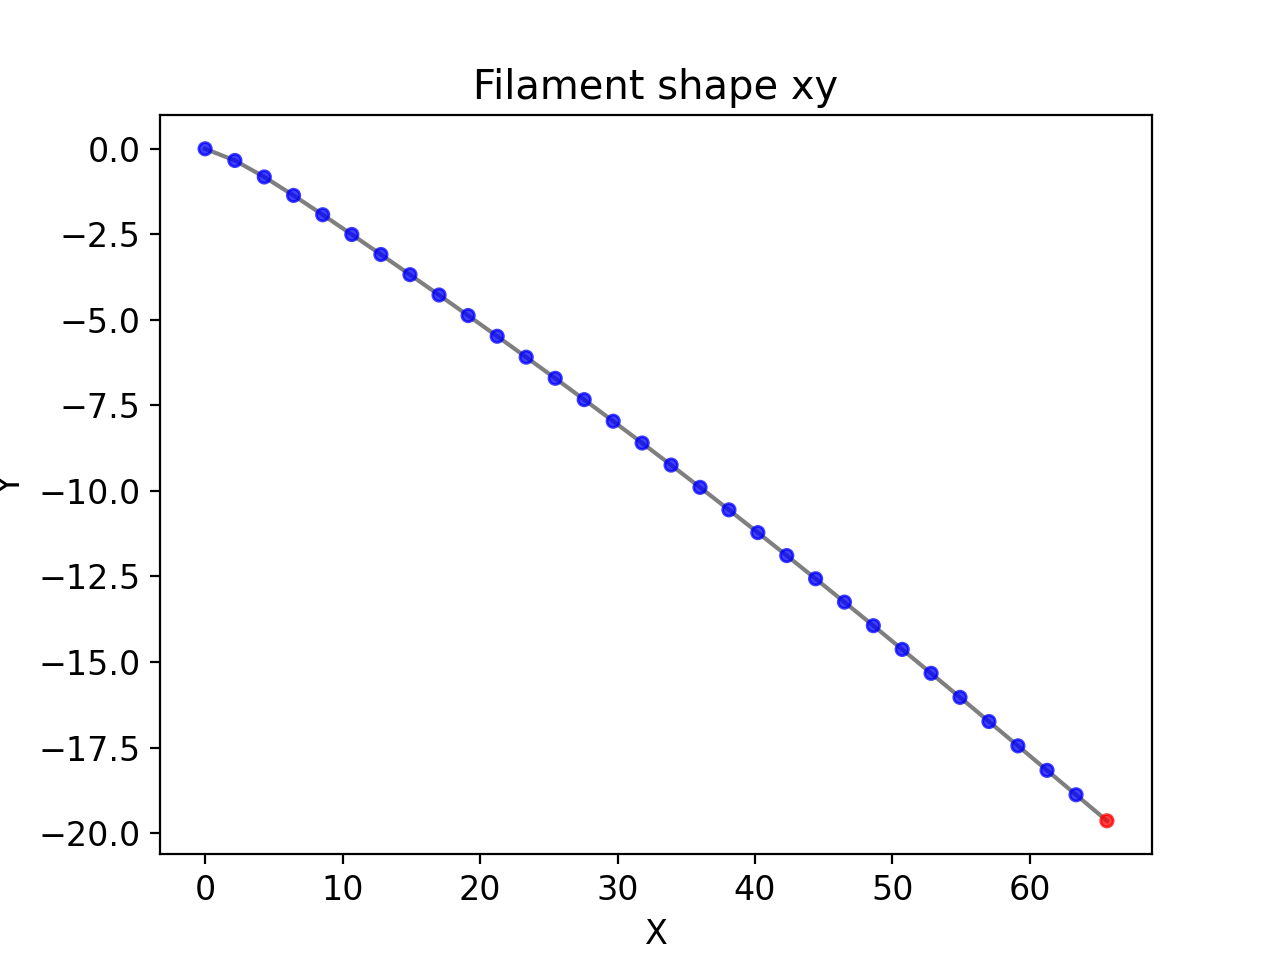

In [47]:
plt.figure()
fil1.plotFilament(r = fil1.r)

In [32]:
print(fil1.r)

[4.65474308e-310 6.92748321e-310 6.92747610e-310 6.92747680e-310
 4.65474308e-310 4.65474308e-310 4.65474308e-310 4.65474308e-310
 4.65474308e-310 6.92747653e-310 4.65474308e-310 4.65474308e-310
 6.92752304e-310 4.65474308e-310 4.65474308e-310 4.65474308e-310
 4.65474308e-310 4.65474308e-310 4.65474308e-310 4.65474309e-310
 6.92747630e-310 4.65474308e-310 4.65474308e-310 4.65474308e-310
 4.65474308e-310 4.65474308e-310 6.92748339e-310 6.92747628e-310
 4.65474308e-310 4.65474309e-310 4.65474308e-310 6.92748330e-310
 6.92748330e-310 6.92748330e-310 6.92747067e-310 4.65474309e-310
 6.92748330e-310 6.92747067e-310 6.92747622e-310 6.92747653e-310
 6.92747653e-310 6.92747653e-310 6.92747653e-310 6.92747653e-310
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.000000